# Comparing Whisper, Wav2Vec and Google text-to-speech
Since wav2vec does not consider puncutation. The first step would be to normalise all the other documents. To do this we would remove punctuation and make everything lowercase. While punctuation and captialisation are important when analysing the semantics of text, I am only considering the accuracy of transcription. 

## Normalisation of data
Data to normalise: 
* readings.csv
* readTextOnly_whisper.csv
* readTextOnly_wav2vec.csv
* readTextOnly_google.csv



In [2]:
import pandas as pd
from IPython.display import display

readings_df = pd.read_csv("readings.csv")
whsiper_readings_df = pd.read_csv("readTextOnly_whisper.csv")
wav2vec_readings_df = pd.read_csv("readTextOnly_wav2vec.csv")
google_readings_df = pd.read_csv("readTextOnly_google.csv")

display(readings_df.head())
display(whsiper_readings_df.head(5))
display(wav2vec_readings_df.head(5))
display(google_readings_df.head(5))

display(whsiper_readings_df["transcripts"][1])

,reading,text
0,NorthWind,The North Wind and the Sun were disputing whic...
1,BNC,This is because there is less scattering of bl...


,id,transcripts,classification,reading
0,ID27_pd_4_1_1_NorthWind.wav,The North Wind and the Sun were disputing whi...,1,NorthWind
1,ID07_pd_2_0_0_BNC.wav,This is because there is less scattering of b...,1,BNC
2,ID07_pd_2_0_0_NorthWind.wav,The Northwind and the Sun were disputing whic...,1,NorthWind
3,ID18_pd_4_3_3_NorthWind.wav,The North Wind and the Sun were disputing wit...,1,NorthWind
4,ID20_pd_3_0_1_NorthWind.wav,The North Wind and the Sun were disputing whi...,1,NorthWind


,id,transcripts,classification,reading
0,ID27_pd_4_1_1_NorthWind.wav,The north wind and the sun were disputin which...,1,NorthWind
1,ID07_pd_2_0_0_BNC.wav,This is because there is less scattering of bl...,1,BNC
2,ID07_pd_2_0_0_NorthWind.wav,The north wind and the sun were disputing whic...,1,NorthWind
3,ID18_pd_4_3_3_NorthWind.wav,The north wind and t e sun or disputing wie de...,1,NorthWind
4,ID20_pd_3_0_1_NorthWind.wav,The north wind and the sun were disputing whic...,1,NorthWind


,id,transcripts,classification,reading
0,ID18_pd_4_3_3_NorthWind.flac,The North Wind and the Sun. Disputing. With ...,1,NorthWind
1,ID02_pd_2_0_0_BNC.flac,This is because there is less scattering of bl...,1,BNC
2,ID30_pd_2_1_1_NorthWind.flac,"The North Wind and the sun with disputing, whi...",1,NorthWind
3,ID33_pd_3_2_2_NorthWind.flac,"The North Wind and the Sun. Disputing, which ...",1,NorthWind
4,ID02_pd_2_0_0_NorthWind.flac,The North Wind and the sun were disputing whic...,1,NorthWind


" This is because there is less scattering of blue light as the atmospheric path length and consequently the degree of scattering of the incoming radiation is reduced. For the same reason, the sun appears to be whiter and less orange-colored as the observer's altitude increases. This is because a greater proportion of the sunlight comes directly to the observer's eye. Figure 5.7 is a schematic representation of the path of electromagnetic energy in the visible spectrum as it travels from the sun to the earth and back again towards a sensor mounted on an orbiting satellite. The paths of waves representing energy prone to scattering, that is, the shorter wavelengths, as it travels from the sun to earth, are shown. To the sensor it appears that all the energy has been reflected from point P on the ground, whereas in fact it is not, because summits has been scattered within the atmosphere and has never reached the ground at all."

In [3]:
import re
def normalise_text(df_name,col_name:str):
    df_name[col_name]=df_name[col_name].apply(lambda x: x.replace("5.7", "five point seven"))
    df_name[col_name] =[re.sub('[^\w\s]+', '', s) for s in df_name[col_name].tolist()]
    df_name[col_name] = df_name[col_name].str.lower()
    display(df_name.head())

normalise_text(readings_df,"text")
normalise_text(whsiper_readings_df,"transcripts")
normalise_text(wav2vec_readings_df,"transcripts")
normalise_text(google_readings_df,"transcripts")


,reading,text
0,NorthWind,the north wind and the sun were disputing whic...
1,BNC,this is because there is less scattering of bl...


,id,transcripts,classification,reading
0,ID27_pd_4_1_1_NorthWind.wav,the north wind and the sun were disputing whi...,1,NorthWind
1,ID07_pd_2_0_0_BNC.wav,this is because there is less scattering of b...,1,BNC
2,ID07_pd_2_0_0_NorthWind.wav,the northwind and the sun were disputing whic...,1,NorthWind
3,ID18_pd_4_3_3_NorthWind.wav,the north wind and the sun were disputing wit...,1,NorthWind
4,ID20_pd_3_0_1_NorthWind.wav,the north wind and the sun were disputing whi...,1,NorthWind


,id,transcripts,classification,reading
0,ID27_pd_4_1_1_NorthWind.wav,the north wind and the sun were disputin which...,1,NorthWind
1,ID07_pd_2_0_0_BNC.wav,this is because there is less scattering of bl...,1,BNC
2,ID07_pd_2_0_0_NorthWind.wav,the north wind and the sun were disputing whic...,1,NorthWind
3,ID18_pd_4_3_3_NorthWind.wav,the north wind and t e sun or disputing wie de...,1,NorthWind
4,ID20_pd_3_0_1_NorthWind.wav,the north wind and the sun were disputing whic...,1,NorthWind


,id,transcripts,classification,reading
0,ID18_pd_4_3_3_NorthWind.flac,the north wind and the sun disputing with th...,1,NorthWind
1,ID02_pd_2_0_0_BNC.flac,this is because there is less scattering of bl...,1,BNC
2,ID30_pd_2_1_1_NorthWind.flac,the north wind and the sun with disputing whic...,1,NorthWind
3,ID33_pd_3_2_2_NorthWind.flac,the north wind and the sun disputing which wa...,1,NorthWind
4,ID02_pd_2_0_0_NorthWind.flac,the north wind and the sun were disputing whic...,1,NorthWind


In [4]:
display(whsiper_readings_df["transcripts"][1].replace("5","five"))

' this is because there is less scattering of blue light as the atmospheric path length and consequently the degree of scattering of the incoming radiation is reduced for the same reason the sun appears to be whiter and less orangecolored as the observers altitude increases this is because a greater proportion of the sunlight comes directly to the observers eye figure five point seven is a schematic representation of the path of electromagnetic energy in the visible spectrum as it travels from the sun to the earth and back again towards a sensor mounted on an orbiting satellite the paths of waves representing energy prone to scattering that is the shorter wavelengths as it travels from the sun to earth are shown to the sensor it appears that all the energy has been reflected from point p on the ground whereas in fact it is not because summits has been scattered within the atmosphere and has never reached the ground at all'

## Compare Word Error Rate (WER) 
WER is a common metric to compare ASR models. The current thesis will use the python package JiWER. Documnetation can be found: https://pypi.org/project/jiwer/

There will be different ways to compare the ASR models 
1. Use all readings with all classes to calculate the WER for each model and compare the error rate 
2. Compare the WER for HC and PD between ASR models 
3. Only use subjectively good samples (i.e. no reading errors) to asses the ASR models 

In [5]:
from jiwer import wer

### Using all readings

In [6]:
def calculateWER (readings_df,asr_df):
    wer_vector = []
    for index,row in asr_df.iterrows():
        if (row["reading"] == "NorthWind"):
            wer_vector.append(wer(readings_df["text"]["NorthWind"],row["transcripts"]))
        elif (row["reading"] == "BNC"):
            wer_vector.append(wer(readings_df["text"]["BNC"],row["transcripts"]))
    asr_df["wer"] = wer_vector
        
    display(asr_df.head())

    return sum(wer_vector)/len(wer_vector)

readings_compare_df = readings_df.set_index('reading')

avg_wer_whsiper = calculateWER(readings_compare_df,whsiper_readings_df)
avg_wer_wav2vec = calculateWER(readings_compare_df,wav2vec_readings_df)
avg_wer_google  = calculateWER(readings_compare_df,google_readings_df)

print(f"Average WER Whisper: {avg_wer_whsiper}")
print(f"Average WER Wav2Vec: {avg_wer_wav2vec}")
print(f"Average WER Google : {avg_wer_google}")

,id,transcripts,classification,reading,wer
0,ID27_pd_4_1_1_NorthWind.wav,the north wind and the sun were disputing whi...,1,NorthWind,0.203540
1,ID07_pd_2_0_0_BNC.wav,this is because there is less scattering of b...,1,BNC,0.024845
2,ID07_pd_2_0_0_NorthWind.wav,the northwind and the sun were disputing whic...,1,NorthWind,0.106195
3,ID18_pd_4_3_3_NorthWind.wav,the north wind and the sun were disputing wit...,1,NorthWind,0.601770
4,ID20_pd_3_0_1_NorthWind.wav,the north wind and the sun were disputing whi...,1,NorthWind,0.044248


,id,transcripts,classification,reading,wer
0,ID27_pd_4_1_1_NorthWind.wav,the north wind and the sun were disputin which...,1,NorthWind,0.292035
1,ID07_pd_2_0_0_BNC.wav,this is because there is less scattering of bl...,1,BNC,0.118012
2,ID07_pd_2_0_0_NorthWind.wav,the north wind and the sun were disputing whic...,1,NorthWind,0.097345
3,ID18_pd_4_3_3_NorthWind.wav,the north wind and t e sun or disputing wie de...,1,NorthWind,0.761062
4,ID20_pd_3_0_1_NorthWind.wav,the north wind and the sun were disputing whic...,1,NorthWind,0.079646


,id,transcripts,classification,reading,wer
0,ID18_pd_4_3_3_NorthWind.flac,the north wind and the sun disputing with th...,1,NorthWind,0.725664
1,ID02_pd_2_0_0_BNC.flac,this is because there is less scattering of bl...,1,BNC,0.142857
2,ID30_pd_2_1_1_NorthWind.flac,the north wind and the sun with disputing whic...,1,NorthWind,0.274336
3,ID33_pd_3_2_2_NorthWind.flac,the north wind and the sun disputing which wa...,1,NorthWind,0.566372
4,ID02_pd_2_0_0_NorthWind.flac,the north wind and the sun were disputing whic...,1,NorthWind,0.141593


Average WER Whisper: 0.1059298531403187
Average WER Wav2Vec: 0.16444469984292998
Average WER Google : 0.2615699678031344


### Comparing HC and PD 

In [7]:
methods = []
avg_wer_hc = []
avg_wer_pd = []
diff_pd_hc = []
avg_wer = []

def avg_wer_per_class(method:str,df):
    df_hc = df[df["classification"]==0]
    df_pd = df[df["classification"]==1]
    methods.append(method)
    avg_wer_hc.append(df_hc["wer"].mean())
    avg_wer_pd.append(df_pd["wer"].mean())
    diff_pd_hc.append(df_pd["wer"].mean()-df_hc["wer"].mean())
    avg_wer.append(df["wer"].mean())


avg_wer_per_class("Whipser",whsiper_readings_df)
avg_wer_per_class("Wav2Vec",wav2vec_readings_df)
avg_wer_per_class("Google",google_readings_df)

class_specific_df = pd.DataFrame(dict(Method = methods, HC = avg_wer_hc, PD = avg_wer_pd, PDHCdiff = diff_pd_hc, Both = avg_wer))
class_specific_df.rename(columns={"PDHCdiff": "PD-HC"},inplace=True)
class_specific_df


,Method,HC,PD,PD-HC,Both
0,Whipser,0.088772,0.134069,0.045297,0.105930
1,Wav2Vec,0.142503,0.200429,0.057926,0.164445
2,Google,0.217659,0.333583,0.115924,0.261570


#### Without ID32 
The reason to exclude this patient is that the recording ended abruptly and so the task wasn't carried out correctly. 

In [8]:
methods = []
avg_wer_hc = []
avg_wer_pd = []
diff_pd_hc = []
avg_wer = []
discard = ["ID32"]

def avg_wer_per_class(method:str,df):
    df = df[~df.id.str.contains('|'.join(discard))] #drops rows with IDs in discard
    df_hc = df[df["classification"]==0]
    df_pd = df[df["classification"]==1]
    methods.append(method)
    avg_wer_hc.append(df_hc["wer"].mean())
    avg_wer_pd.append(df_pd["wer"].mean())
    diff_pd_hc.append(df_pd["wer"].mean()-df_hc["wer"].mean())
    avg_wer.append(df["wer"].mean())


avg_wer_per_class("Whipser",whsiper_readings_df)
avg_wer_per_class("Wav2Vec",wav2vec_readings_df)
avg_wer_per_class("Google",google_readings_df)

class_specific_df = pd.DataFrame(dict(Method = methods, HC = avg_wer_hc, PD = avg_wer_pd, PDHCdiff = diff_pd_hc, Both = avg_wer))
class_specific_df.rename(columns={"PDHCdiff": "PD-HC"},inplace=True)
class_specific_df


,Method,HC,PD,PD-HC,Both
0,Whipser,0.088772,0.131175,0.042403,0.104428
1,Wav2Vec,0.142503,0.192924,0.050421,0.161120
2,Google,0.217659,0.319459,0.101800,0.255247


### Comparing just North Wind readings 
This is because all participants did the northwind readings 

In [9]:
methods = []
avg_wer_hc = []
avg_wer_pd = []
diff_pd_hc = []
avg_wer = []

def avg_wer_north_wind(method:str,df):
    df = df[df["reading"]=="NorthWind"]
    df_hc = df[df["classification"]==0]
    df_pd = df[df["classification"]==1]
    methods.append(method)
    avg_wer_hc.append(df_hc["wer"].mean())
    avg_wer_pd.append(df_pd["wer"].mean())
    diff_pd_hc.append(df_pd["wer"].mean()-df_hc["wer"].mean())
    avg_wer.append(df["wer"].mean())

avg_wer_north_wind("Whipser",whsiper_readings_df)
avg_wer_north_wind("Wav2Vec",wav2vec_readings_df)
avg_wer_north_wind("Google",google_readings_df)

compare_wer_northwind = pd.DataFrame(dict(Method = methods, HC = avg_wer_hc, PD = avg_wer_pd, PDHCdiff = diff_pd_hc, Both = avg_wer))
compare_wer_northwind.rename(columns={"PDHCdiff": "PD-HC"},inplace=True)
display(compare_wer_northwind)

,Method,HC,PD,PD-HC,Both
0,Whipser,0.081332,0.179204,0.097872,0.123655
1,Wav2Vec,0.116730,0.248341,0.131611,0.173643
2,Google,0.200169,0.381084,0.180916,0.278402


#### Without ID32 
The reason to exclude this patient is that the recording ended abruptly and so the task wasn't carried out correctly. 

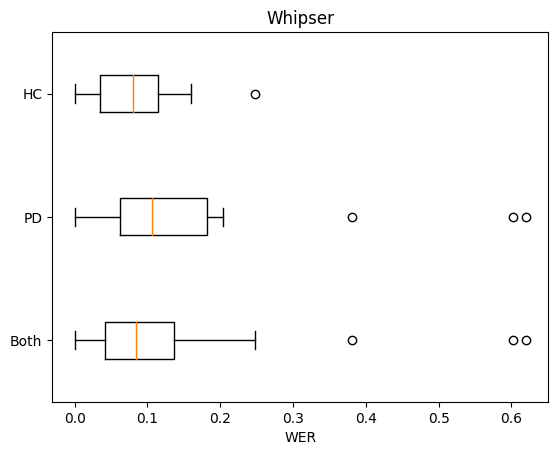

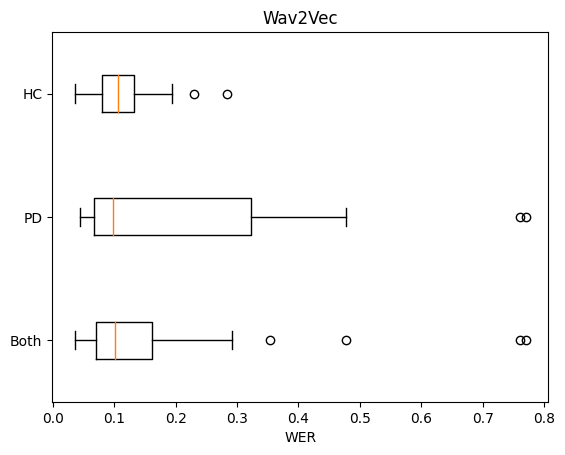

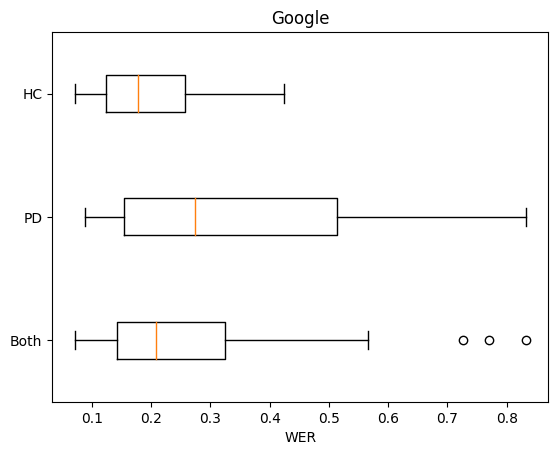

,Method,Average WER (HC),Average WER (PD),Average Difference between HC and PD,Average WER PD:HC,Average WER,SD (HC),SD (PD),SD
0,Whipser,0.081332,0.177581,0.096249,2.183420,0.121436,0.061415,0.198742,0.142375
1,Wav2Vec,0.116730,0.239528,0.122798,2.051986,0.167896,0.059603,0.251584,0.176402
2,Google,0.200169,0.361652,0.161483,1.806737,0.267453,0.095455,0.252370,0.192879


In [32]:
import statistics
import matplotlib.pyplot as plt

methods = []
avg_wer_hc = []
avg_wer_pd = []
diff_pd_hc = []
ratio_pd_hc = []
avg_wer = []
sd_hc = []
sd_pd = []
sd = []
discard = ["ID32"]


def avg_wer_north_wind(method: str, df):
    df_nw = df[df["reading"] == "NorthWind"]
    df_nw = df_nw[
        ~df_nw.id.str.contains("|".join(discard))
    ]  # drops rows with IDs in discard
    df_hc = df_nw[df_nw["classification"] == 0]
    df_pd = df_nw[df_nw["classification"] == 1]
    methods.append(method)
    # AVG WER
    avg_wer_hc.append(df_hc["wer"].mean())
    avg_wer_pd.append(df_pd["wer"].mean())
    diff_pd_hc.append(df_pd["wer"].mean() - df_hc["wer"].mean())
    ratio_pd_hc.append(df_pd["wer"].mean() / df_hc["wer"].mean())
    avg_wer.append(df_nw["wer"].mean())

    # SD
    sd_hc.append(statistics.stdev(df_hc["wer"]))
    sd_pd.append(statistics.stdev(df_pd["wer"]))
    sd.append(statistics.stdev(df_nw["wer"]))

    # BOX PLOT 
    data = [df_nw["wer"],df_pd["wer"],df_hc["wer"]]
    #data = [avg_wer_hc]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    bp = ax.boxplot(data, vert = 0)
    ax.set_yticklabels(['Both','PD','HC'])
    plt.xlabel('WER')
    #plt.boxplot(data)
    plt.title(method)
    
    plt.show()


avg_wer_north_wind("Whipser", whsiper_readings_df)
avg_wer_north_wind("Wav2Vec", wav2vec_readings_df)
avg_wer_north_wind("Google", google_readings_df)

compare_wer_northwind = pd.DataFrame(
    dict(
        Method=methods,
        HC=avg_wer_hc,
        PD=avg_wer_pd,
        PDHCdiff=diff_pd_hc,
        PDHCRatio=ratio_pd_hc,
        Both=avg_wer,
        SD_HC=sd_hc,
        SD_PD=sd_pd,
        SD=sd,
    )
)
compare_wer_northwind.rename(
    columns={
        "HC": "Average WER (HC)",
        "PD": "Average WER (PD)",
        "PDHCdiff": "Average Difference between HC and PD",
        "PDHCRatio": "Average WER PD:HC",
        "Both": "Average WER",
        "SD_HC": "SD (HC)",
        "SD_PD": "SD (PD)",
        "SD": "SD",
    },
    inplace=True,
)
display(compare_wer_northwind)

### Box Whisker plots
This is the subset of North Wind readings only and excluding ID32